In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import time
plt.rcParams.update({'font.size': 20,})

In [2]:
# partice pro perties and constants
scale = 1e-12
mass = 9.109e-31
hbar = 1.055e-34
charge = -1.602e-19
N = 128

In [3]:
def potential(v):
    
    k= 9*10**9
    q1 = 1.602e-19
    x1 = 40
    y1 = 40
    q2 = 1.602e-19
    x2 = 65
    y2 = 100
    q3 = 1.602e-19
    x3 = 100
    y3 = 60
                
    for i in range(N):
        for j in range(N):
            r1 = ((i-x1)**2+(j-y1)**2)**.5 * scale
            r2 = ((i-x2)**2+(j-y2)**2)**.5 * scale
            r3 = ((i-x3)**2+(j-y3)**2)**.5 * scale
            if r1 != 0:
                v[i][j] = k * q1 / r1
            else:
                v[i][j] = k * q1 / scale
            if r2 != 0 :
                v[i][j] += k * q2 / r2 
            else:
                v[i][j] += k * q2 / scale
            if r3 != 0:
                v[i][j] += k * q3 / r3
            else:
                v[i][j] += k * q3 / scale
        
    return v

In [4]:
def lanczos(v0,m,q):
    #Writing Lanczos Algorithm
    #Initial Iteration
    w = []
    beta = [0]
    v = [v0]
    wp = []
    alpha = []
    w0p = Hx(v0, q, phi)
    wp.append(w0p)
    alpha0 = np.conj(w0p.T) @ v0
    alpha.append(alpha0)
    w0 = w0p - alpha0 * v0
    w.append(w0)
    #Repeated Iteration
    for j in range(1,m):
        betaj = np.linalg.norm(w[j-1])
        beta.append(betaj)
        vj = w[j-1]/beta[j]
        v.append(vj)
        wjp = Hx(v[j], q, phi)
        wp.append(wjp)
        alphaj = np.conj(wp[j].T) @ v[j]
        alpha.append(alphaj)
        wj = wp[j] - alpha[j] * v[j] - beta[j] * v[j-1]
        w.append(wj)   
        
    v = np.array(v)
    V = v.T
    Teigenvals, Teigenvecs = eigh_tridiagonal(alpha,beta[1:]) #tridiagonal matrix with alphas on main diagonal and betas on adjacent ones
    groundstate_eigenval = Teigenvals[0]
    groundstate_eigenvec = Teigenvecs[:,0]
    print(groundstate_eigenval)
    return V @ groundstate_eigenvec   
    
    
    

In [5]:
xy1 = np.mgrid[0:N,0:N]
xy = xy1.reshape(2,-1)
xp = np.roll(xy1,-1,axis=1).reshape(2,-1)
xm = np.roll(xy1,1,axis=1).reshape(2,-1)
yp = np.roll(xy1,-1,axis=2).reshape(2,-1)
ym = np.roll(xy1,1,axis=2).reshape(2,-1)

def Hx(x,q,phi):
   #Create discrete version of Hamiltonian operator
    x = x.reshape(int(np.sqrt(len(x))),-1)
    ax = np.zeros(x.shape)

    #Use discrete schrodinger equation
    ax[xy[0,:],xy[1,:]] = -hbar/(2*mass*scale*scale)*(-4*x[xy[0,:],xy[1,:]] + x[xp[0,:],xp[1,:]] + x[xm[0,:],xm[1,:]] +  x[yp[0,:],yp[1,:]] + x[ym[0,:],ym[1,:]])+q*phi[xy[0,:],xy[1,:]]*x[xy[0,:],xy[1,:]] 
    #reset boundary
    ax[0,:] = 0
    ax[:,0] = 0
    ax[N-1,:] = 0
    ax[:,N-1] = 0

    return ax.flatten()

    

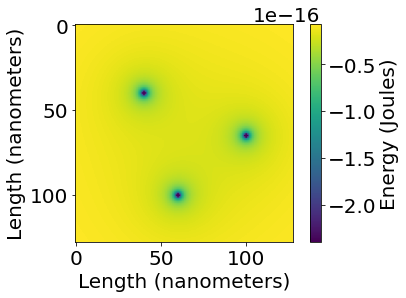

In [6]:
#Creating potential
phi = np.ones((N,N))
phi = potential(phi)
#Creating grid
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)
               
Z = charge * phi[X][Y]
fig, ax = plt.subplots()
#Plot Potential
plt.imshow(Z)
plt.rcParams['figure.dpi']=2000
cbar = plt.colorbar()
cbar.set_label("Energy (Joules)")
plt.xlabel("Length (nanometers)")
plt.ylabel("Length (nanometers)")
#plt.yticks(fontsize=20)
#plt.xticks(fontsize=20)
plt.show()


In [7]:
#Create starting v0
v0 = np.ones((N,N))
v0 = potential(v0)
#for i in range(N):
#    for j in range(N):
#        if(i == 0 or i == N-1 or j == 0 or j == N-1):
#            v0[i][j] = 0
v0 = v0/np.linalg.norm(v0)
v0 = v0.flatten()

In [8]:
iterations = 200

t1 = time.time()
for i in range(iterations):
    result = lanczos(v0,10,charge)
    v0 = result/np.linalg.norm(result)
t2 = time.time()
print("Time taken: " + str(round(t2-t1,3)) + " seconds.")

2.3462217998384426e+17
9.435973161551408e+16
6.266249966717725e+16
4.947732168013255e+16
4.404241533969948e+16
3.855708532933417e+16
3.6918622758891304e+16
3.365065215019788e+16
3.3057239246319984e+16
3.0782648477842068e+16
3.055821621098219e+16
2.8802517651074616e+16
2.8713529701993956e+16
2.7240327479891656e+16
2.7205651114242148e+16
2.5867693845137516e+16
2.586529155814611e+16
2.454291085818349e+16
2.4571683726144092e+16
2.3133114194332896e+16
2.3196120656626228e+16
2.145173107119714e+16
2.1548971777532628e+16
1.9204502275128788e+16
1.9335963314527584e+16
1.6190639972023998e+16
1.6362680960380668e+16
1.3220692366572606e+16
1.3296540474010528e+16
1.102336003381341e+16
1.0962692383582788e+16
9469122440706616.0
9388835573408868.0
8369367671376985.0
8283338495934517.0
7526396659495141.0
7448612256261796.0
6848031897337222.0
6776937445538301.0
6277390356058894.0
6213123827689984.0
5781729455359055.0
5724559229187126.0
5341273562319056.0
5291192241248560.0
4942889249942246.0
4899800227040

In [9]:
wavefunction = np.reshape(v0, (N,N))
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)
                   
wavefunction = wavefunction[X][Y]
fig, ax = plt.subplots()
#plot wavefunction squared to give probability plot
probability = wavefunction**2
norm = np.sum(probability)
probability = probability / norm
plt.imshow(probability)
cbar = plt.colorbar()
cbar.set_label("Probability per sqaure nanometer")
plt.xlabel("Length (nanometers)")
plt.ylabel("Length (nanometers)")
plt.show()